<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Изучим-сеты" data-toc-modified-id="Изучим-сеты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Изучим сеты</strong></a></span></li><li><span><a href="#Выберем-топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Выберем-топ-10-городов-по-количеству-рейсов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong>Выберем топ-10 городов по количеству рейсов</strong></a></span></li><li><span><a href="#Модели-самолётов-и-количество-рейсов" data-toc-modified-id="Модели-самолётов-и-количество-рейсов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong>Модели самолётов и количество рейсов</strong></a></span></li><li><span><a href="#Построим-график-по-всем-городм-с-количеством-рейсов" data-toc-modified-id="Построим-график-по-всем-городм-с-количеством-рейсов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><strong>Построим график по всем городм с количеством рейсов</strong></a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns

In [2]:
query_1 = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')
query_3 = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

### **Изучим сеты**

In [3]:
def query_check (data):
    return data.info(), 'Пропуски:', data.isnull().sum(), 'Дубли:', data.duplicated().sum()

In [4]:
display(query_1)
query_check(query_1)

model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


(None,
 'Пропуски:',
 model             0
 flights_amount    0
 dtype: int64,
 'Дубли:',
 0)

In [5]:
display(query_3)
query_check(query_3)

city  average_flights
0            Абакан         3.870968
1           Анадырь         1.000000
2             Анапа         2.161290
3       Архангельск         5.354839
4         Астрахань         2.451613
..              ...              ...
96             Чита         1.580645
97           Элиста         4.870968
98   Южно-Сахалинск         4.290323
99           Якутск         2.741935
100       Ярославль         1.322581

[101 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


(None,
 'Пропуски:',
 city               0
 average_flights    0
 dtype: int64,
 'Дубли:',
 0)

С данными все нормально, пропусков и дублей нет

### **Выберем топ-10 городов по количеству рейсов**

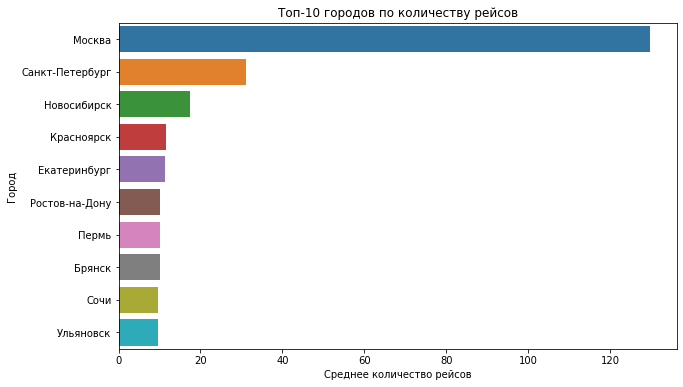

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False).head(10))
plt.title('Топ-10 городов по количеству рейсов')
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Город');

Без сюрпризов, Москва лидирует.

### **Модели самолётов и количество рейсов**

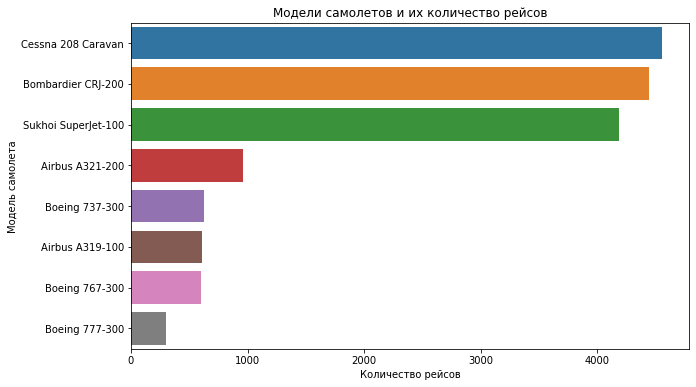

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='flights_amount',
            y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False))
plt.title('Модели самолетов и их количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета');

Сессна и Bombardier это небольшие самолетики с небольшой дальностью полета, мини мальный экипаж и простота обслуживания, естественно, что у них просто больше маршрутов в районке одного региона. В 2019 году на SSJ100 пришлось более 51% суммарного пассажирооборота, выполненного в России на всех гражданских региональных реактивных и турбовинтовых самолётах. 
Аэробусы это большие самолеты выполняющие, в т.ч., международные рейсы.  
Т.о. есть прямая зависимость от расстояния и количества рейсов. Маленькие самолетики  летают ближе но чаще.

### **Построим график по всем городм с количеством рейсов**

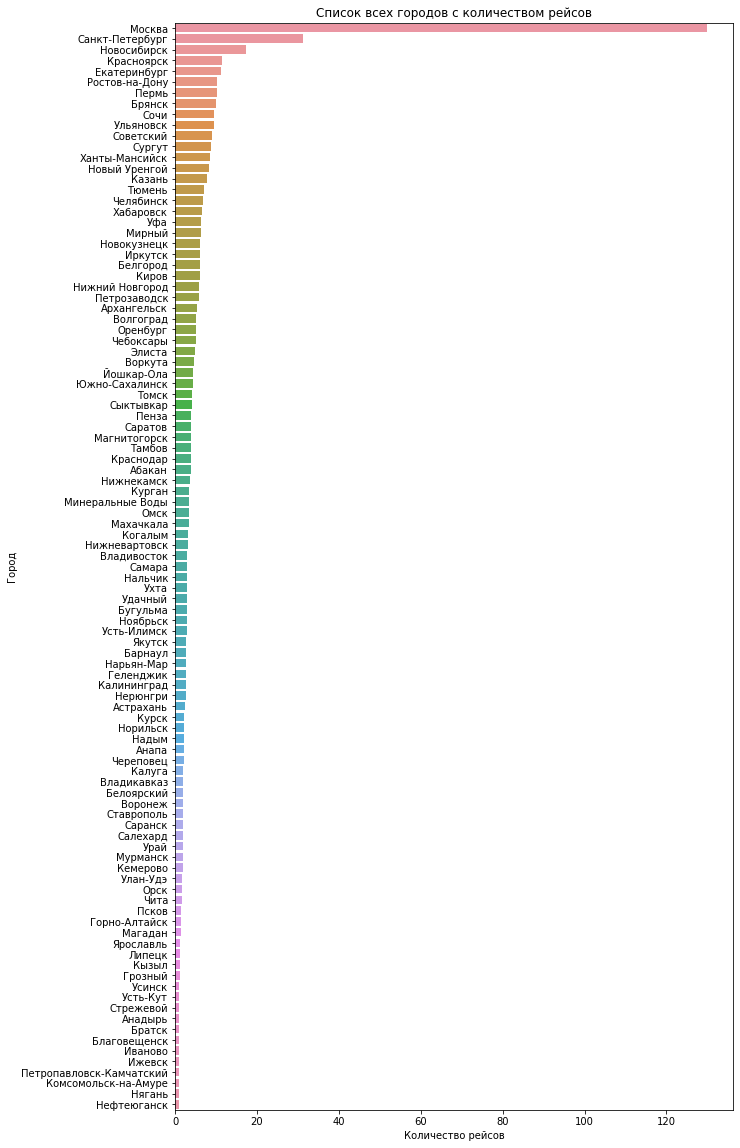

In [8]:
plt.figure(figsize=(10,20))
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.title('Список всех городов с количеством рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город');

Вполне закономерная статистика - основная масса полетов, это Москва, СПб и крупнейшие города России с большим населением и большими аэропортами. Уверена что есть есть некая сезонная зависимость от сезонности - на юг летом будут летать больше. Но общая картина не сильно изменится.

**Вывод**

1. По графикам видно, что больше полетов у самолетов малой авиации и дальности, короткие и частые внутрирегиональные рейсы.  
2. Наибольшее соличество рейсов закономерно совершаются в крупнейшие города с крупными транспортными узлами. Столица, соответственно является лидером.  
3. Есть прямая зависисмость от размера населенного пункта, его населения, отдаленности от крупных транспортных узлов и количеством рейсов.


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Файлы изучены
- [ ]  Типы данных проверены на корректность
- [ ]  Выбран топ-10 городов по количеству рейсов
- [ ]  Построен график «Модели самолётов и количество рейсов»
- [ ]  Построен график «Города и количество рейсов»
- [ ]  Построен график «Топ-10 городов и количество рейсов»
- [ ]  На каждом этапе написаны выводы
- [ ]  Написан общий вывод